2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

# A. Introduction  

In this notebook, we will try to build a model predicting the price of house in US. The Housing price is continuous number, so we will consider this is a regression problem. To solve this problem, we will come through this notebook with two steps:  
<ol>
<li>First, we will analyse our dataset for having better understanding. There are a couple of tasks will be done in this steps:</li>
- Features transforming  
- Filling missing data  
- Features selection  
<li>Second, we will try to build the price predicting model with some regression model. Most of models in this part will be implement by scikit-learn library.</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
import time
from sklearn.model_selection import KFold
from sklearn import linear_model

# B. Data Exploring

In [2]:
HousingPriceDF = pd.read_csv('Data/train.csv')
print("Size of train set:",HousingPriceDF.shape)
HousingPriceDF.head()

Size of train set: (1200, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
TestDF = pd.read_csv('Data/test.csv')
print("Size of test set:",TestDF.shape)
TestDF.head()

Size of test set: (260, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml
1,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
2,1203,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
3,1204,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
4,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal


* Our train set has 1200 rows with 81 features. Test set has 260 rows with 80 features.
* Obviously, 'Id' column does not contain any information supporting for our predicting model.  

In [4]:
# Deleting "Id" columns from dataset
del HousingPriceDF['Id']

In [5]:
HousingPriceDF['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

Our dataset is Sale price of House for five years, from 2006 to 2010.

* Sale Price column is the target of our model. Firstly, we will take a look about the property of Sale Price.

## I. Sale Price

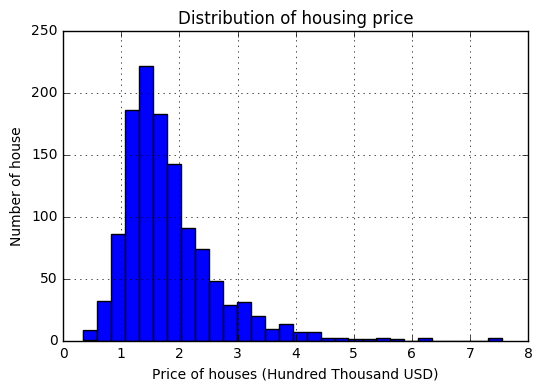

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [6]:
plt.title("Distribution of housing price")
plt.hist(HousingPriceDF['SalePrice']/10**5,bins=30)
plt.xlabel("Price of houses (Hundred Thousand USD)")
plt.ylabel("Number of house")
plt.grid(True)
plt.show()
print(HousingPriceDF['SalePrice'].describe())

* Our prices change from 34.900 to 755.000 with mean 181.414 and standard deviation is 81.070. 
* Most of the houses were sold at price from 100.000USD to 300.000USD
* One importance observation is that our sale price is left-skewed distribution. In this notebook, we will use linear model to predict the price, and it will be better if the target value is simmilar to normal distribution. Thus, it might be better to train with logarithm of sale price

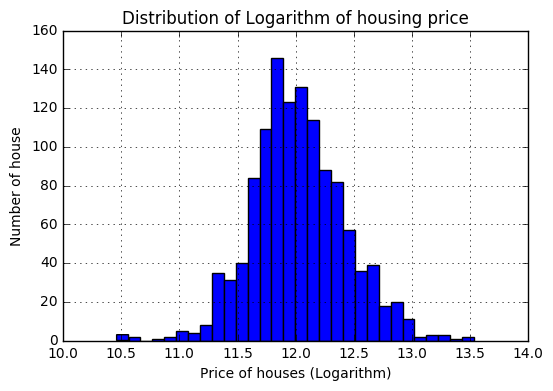

count    1200.000000
mean       12.024861
std         0.403556
min        10.460242
25%        11.774520
50%        12.005790
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


In [7]:
plt.title("Distribution of Logarithm of housing price")
plt.hist(np.log(HousingPriceDF['SalePrice']),bins=30)
plt.xlabel("Price of houses (Logarithm)")
plt.ylabel("Number of house")
plt.grid(True)
plt.show()
#Some statistical numbers of Logarithm of SalePrice
print(HousingPriceDF['SalePrice'].apply(lambda x: np.log(x)).describe())

* The logarithm of prices change from 10.46 to 13.53 with mean 12.02 and standard deviation is 0.40. This means that if we use the simplist approach is using mean of logarithm of prices for all the case, the RMSE is 0.40.  

There is a couple of benefits when we use logarithm of Sale price to train:  
* First, as we see from above histogram, logarithm makes our sale price's distribution similar to normal distribution.
* Second, as traininng model by logarithm value, our predicted price will never be negative as the reality.

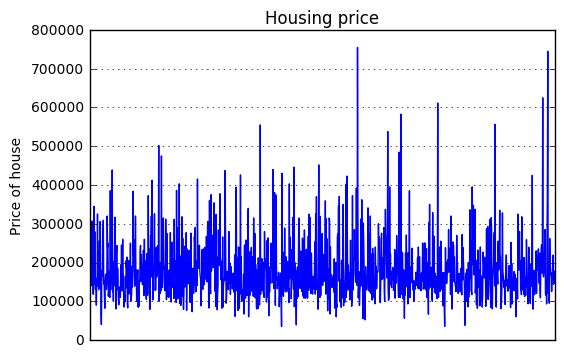

In [8]:
plt.title("Housing price")
plt.plot(HousingPriceDF['SalePrice'].values)
plt.ylabel("Price of house")
plt.xticks([])
plt.grid(True)
plt.show()

With this plot, the housing price seems to be randomly, and it is hard to get some insight about the housing price. For human understanding, it is easier when we see somet thing that in order. So we will try to sort our dataset by Sale price and see how the sale price is

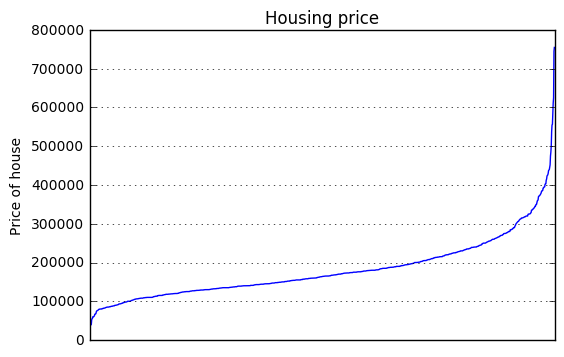

In [9]:
#Sort our dataset by SalePrice
HousingPriceDF = HousingPriceDF.sort_values(by='SalePrice',ascending=1)
plt.title("Housing price")
plt.plot(HousingPriceDF['SalePrice'].values)
plt.ylabel("Price of house")
plt.xticks([])
plt.grid(True)
plt.show()

With this chart, it is more clear to see that most of houses were sold at price from 100.000USD to 300.000USD

In [10]:
SalePrice = HousingPriceDF.SalePrice
print("Percentage of Houses have price from 100.000 to 300.000:", \
      SalePrice[(SalePrice>10**5)&(SalePrice<3*10**5)].count()*100/len(SalePrice))

Percentage of Houses have price from 100.000 to 300.000: 82.9166666667


Now, we will analysis other features which will be used to predict our housing price.

## II. Features Exploring

There are different types of data in our dataset, we will find how may datatypes and how many features for each types

In [11]:
#List all datatype in our dataset.
print("All datatype in dataset:", np.unique(HousingPriceDF.dtypes))

All datatype in dataset: [dtype('int64') dtype('float64') dtype('O')]


Our dataset contains Integer, Float, and Object. Integer and Float are numerical features and Object is non-numerical features, or category features. 
* With numerical features, it can be used directly in our model to predict 
How many features are there for Numerical features and category features?

In [12]:
def ExtractFeaturesType(dataframe):
    """
    Extract list of categoric features name and numerical features name.
    
    Args: 
        dataframe (DataFrame): input dataframe.
    Returns: 
        CatCols (list): List of categoric features.
        NumCols (list): List of Numerical features.
    """
    # Numerical datatype in our dataset is np.float and np.int
    numericaltype = [np.float, np.int] 
    #List of columns name that the values in those columns are not float or integer.
    CatCols = [col for col in dataframe \
               if dataframe[col].dtypes not in numericaltype]
    #List of columns name that the values in those columns are float or integer.
    NumCols = [col for col in dataframe.drop('SalePrice', axis=1) \
               if dataframe[col].dtypes in numericaltype]
    return CatCols,NumCols
CategoryFeatures,NumericalFeatures = ExtractFeaturesType(HousingPriceDF)
print("Number of columns those are not numeric:", len(CategoryFeatures))
print("Number of columns those are numeric (not count Price Columns):", \
      HousingPriceDF.shape[1]-len(CategoryFeatures)-1)

Number of columns those are not numeric: 43
Number of columns those are numeric (not count Price Columns): 36


 ***Missing value:*** We will analyse the missing information in train set and test set

In [13]:
def CalMissingInfor(dataframe):
    """
    Extract informaiton of missing value of each features
    
    Args: 
        dataframe (DataFrame): input dataframe.
    Returns: 
        MissDF (DataFrame): Result of missing value information, include the datatype for features.
        There are four columns in this return dataframe:
        - FeatureName: Name of feature
        - MissingNum: Number of missing datapoint in feature mentioned in FeaturesName
        - MissingPercentage: Percentage of missing datapoint in feature mentioned in FeaturesName
        - Type: datatype of feature mentioned in FeaturesName
        
    """
    MissRatioList = []
    datasize=dataframe.shape[0]
    for col in dataframe:
        #Iterate through all the columns in our dataframe
        MissDict = dict()  #Dictionary that contains the information of each feature.
        MissDict['FeatureName'] = col #Contains the name of features.
        MissDict['MissingNum'] = np.sum(dataframe[col].isnull()*1) #count Null values in each features
        MissDict['MissingPercentage'] = (MissDict['MissingNum']/datasize)*100 # Change to percentage
        MissDict['Type'] = dataframe[col].dtypes #Contains datatype of features
        MissRatioList.append(MissDict)
    #Change from list of dictionaries to dataframe.
    MissDF = pd.DataFrame.from_records(MissRatioList)
    #Keep only features that have mising values. Sort the dataframe by MissingRatio
    MissDF = MissDF[MissDF.MissingPercentage>0].sort_values(by='MissingPercentage', ascending=0)
    return MissDF

In [14]:
HousingPriceDF.groupby('MiscFeature').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MiscFeature,,,,,,,,,,,,,,,,,,,,,
Gar2,1,1,0,1,1,0,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
Othr,2,2,2,2,2,0,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
Shed,44,44,31,44,44,3,44,44,44,44,...,44,44,0,19,44,44,44,44,44,44


In [15]:
MissTrainDf = CalMissingInfor(HousingPriceDF)
print("Number of features have missing values in train set",MissTrainDf.shape[0])
MissTrainDf

Number of features have missing values in train set 18


,FeatureName,MissingNum,MissingPercentage,Type
71,PoolQC,1196,99.666667,object
73,MiscFeature,1153,96.083333,object
5,Alley,1125,93.750000,object
72,Fence,973,81.083333,object
56,FireplaceQu,564,47.000000,object
2,LotFrontage,210,17.500000,float64
57,GarageType,67,5.583333,object
58,GarageYrBlt,67,5.583333,float64
59,GarageFinish,67,5.583333,object
62,GarageQual,67,5.583333,object


In [16]:
MissTestDf = CalMissingInfor(TestDF)
print("Number of features have missing values in test set",MissTestDf.shape[0])
MissTestDf

Number of features have missing values in test set 19


,FeatureName,MissingNum,MissingPercentage,Type
72,PoolQC,257,98.846154,object
74,MiscFeature,253,97.307692,object
6,Alley,244,93.846154,object
73,Fence,206,79.230769,object
57,FireplaceQu,126,48.461538,object
3,LotFrontage,49,18.846154,float64
58,GarageType,14,5.384615,object
59,GarageYrBlt,14,5.384615,float64
60,GarageFinish,14,5.384615,object
63,GarageQual,14,5.384615,object


* **PoolQC:** The missing value in PoolQC indicate that the house does not have Pool. There is only four datapoints in PoolQC features but there are four posible value of PoolQC:  Ex, Gd, TA, Fa. So the dataset is not large enough to model the relation between PoolQC and SalePrice. We should not consider this feature when training.

In [17]:
#Drop PoolQC feature in train set
HousingPriceDF = HousingPriceDF.drop('PoolQC',axis=1)
#Drop PoolQC feature in test set
TestDF = TestDF.drop('PoolQC',axis=1)

* **MiscFeature:** This columns contains the additional information for house. There are five possible additional informaiton: Elev, Gar2, Othr, Shed and TenC, but not all of them are available in our dataset. Let's see the availability of those additional features:

In [18]:
HousingPriceDF[['MiscFeature','SalePrice']].groupby('MiscFeature').count()

,SalePrice
MiscFeature,
Gar2,1
Othr,2
Shed,44


* We can see that there is only three available additional features in our train set. Furthermore, the data for Gar2 and Othr are too small to model the relation with SalePrice. So for this MiscFeature, we will generate a new feature name **MiscFeature_Shed**, and the value of this column will be get from 'MiscVal' columns where the value of "MiscFeature" is "Shed". The other rows, where "MiscFeature" is not "Shed", "MiscFeature_Shed" is ZERO.

In [19]:
HousingPriceDF['MiscFeature_Shed'] = HousingPriceDF.MiscVal*(HousingPriceDF.MiscFeature == "Shed")
HousingPriceDF = HousingPriceDF.drop(['MiscVal','MiscFeature'],axis=1)
TestDF['MiscFeature_Shed'] = TestDF.MiscVal*(TestDF.MiscFeature == "Shed")
TestDF = TestDF.drop(['MiscVal','MiscFeature'],axis=1)

* **Alley:** NA in Alley column means there is No alley access this house. We will keep NA for this feature and discuss about it later when we analyze categoric features. Even the NA value is have really high percentage in this features, we believe that "Not-NA" values is still enough to contribute to our model, because there is only tw"Not-NA" possible value in this features: Paved and Gravel.
* **Fence:**  NA in Fence column means there is No Fence of this house. Again, we will keep NA for this feature and discuss about it later when we analyze categoric features.
* **FireplaceQu:**  NA in FireplaceQu column means there is No Fireplace in this house. Again, we will keep NA for this feature and discuss about it later when we analyze categoric features.
* **LotFrontage:** To fill missing data of LotFrontage, we have some approaches. Simple way is filling by mean value of LotFrontage, one another way is calculating LotFrontage from other features. First, let take a look on some statistic number of LotFrontage:

In [20]:
HousingPriceDF['LotFrontage'].describe()

count    990.000000
mean      70.086869
std       23.702029
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

If filling by mean value, the MSE is std and it is 23.702029. Now, we try to calculate LotFrontage from other features. We have a list of features related to lot is LotArea, LotShape, LotConfig, it might be a relation between LotArea with LotFrontage.

In [21]:
LotMeasure = HousingPriceDF[['LotFrontage','LotArea']][HousingPriceDF.LotFrontage.notnull()]
LotMeasure.corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.390132
LotArea,0.390132,1.000000


The correlation is not high. LotArea maybe in different shapes, but let we assume that it is square, then LotFrontage maybe have higher correlation with square root of LotArea.

In [22]:
LotMeasure['LotArea_SQRT'] = np.sqrt(LotMeasure['LotArea'])
LotMeasure.corr()

,LotFrontage,LotArea,LotArea_SQRT
LotFrontage,1.000000,0.390132,0.585284
LotArea,0.390132,1.000000,0.890034
LotArea_SQRT,0.585284,0.890034,1.000000


The correlation increases to 0.58, not too high, but still better than LotArea. Now we try to fit linear model between LotArea_SQRT and LotFrontage, and check MSE to know is it better than choosing the simple approach mentioned above. We will use KFold to do the cross validation.

In [23]:
LotArea_SQRT = LotMeasure['LotArea_SQRT'].values
LotFrontage = LotMeasure['LotFrontage'].values
#Reshape those array to correct dimension
LotArea_SQRT = LotArea_SQRT.reshape(len(LotArea_SQRT),1)
LotFrontage = LotFrontage.reshape(len(LotArea_SQRT),1)

In [24]:
def CalRMSE(p,t):
    """
    Calculate mean square error
    Args:
        p: predicted value
        t: target value
    Returns:
        MSE
    """
    return np.sqrt(np.mean((p-t)**2))
# define KFold with 10 fold.
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(LotArea_SQRT)

error = []
#fit_intercept=True because our target is not already centered
regr = linear_model.LinearRegression(fit_intercept=True)
for train_index, test_index in kf.split(LotArea_SQRT):
    #LotArea_SQRT is features
    X_train, X_test = LotArea_SQRT[train_index], LotArea_SQRT[test_index]
    #LotFrontage is target
    y_train, y_test = LotFrontage[train_index], LotFrontage[test_index]
    regr.fit(X_train,y_train)
    error.append(CalRMSE(regr.predict(X_test),y_test))
print("Mean error:",np.mean(error))

Mean error: 19.3290149768


We can see that it nearly the same with using mean value. To be simple, we will fill the missing value by mean value of LotFrontage

In [25]:
meanLotFrontage = np.mean(HousingPriceDF['LotFrontage'])
HousingPriceDF['LotFrontage'] = HousingPriceDF['LotFrontage'].fillna(meanLotFrontage)
TestDF['LotFrontage'] = TestDF['LotFrontage'].fillna(meanLotFrontage)

* **GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond** The missing value of those features are because the not availability of Garage in the house. For **GarageYrBlt**, we will replace missing value by ZERO. The others features, the missing value will be kept as NA and will be processes in categoric features transforming.
* **BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtCond, BsmtQual:**  The missing value of those features are because the not availability of Basement in the house. The missing value will be kept as NA and will be processes in categoric features transforming.
* **MasVnrType, MasVnrArea**  Since Masonry veneer (MasVnr) columns contain value "None" which indicates "None" for MasVnrType, missing information ("NA") might contain other meaning. However, since it is only 6 cases of "NA" in columns related to MasVnr, it will not affect a lot if we also treat them as not available in house. Thus, MasVnrArea will be set at ZERO and MasVnrType will still be kept as NA and will be processes in categoric features transforming. 

In [26]:
#Filling missing information for train set
HousingPriceDF['GarageYrBlt'] = HousingPriceDF['GarageYrBlt'].fillna(0)
HousingPriceDF['MasVnrArea'] = HousingPriceDF['MasVnrArea'].fillna(0)
#Filling missing information for test set
TestDF['GarageYrBlt'] = TestDF['GarageYrBlt'].fillna(0)
TestDF['MasVnrArea'] = TestDF['MasVnrArea'].fillna(0)

* **Electrical:** we will fill missing data by the majority value of Electrical - SBrkr

In [27]:
HousingPriceDF[['Electrical','SalePrice']].groupby('Electrical').count()

,SalePrice
Electrical,
FuseA,80
FuseF,21
FuseP,3
Mix,1
SBrkr,1095


In [28]:
TestDF['Electrical'] = TestDF['Electrical'].fillna('SBrkr')

Now, we will go through each type of features: Numerical features and Categoric features.
- With numerical Features, we will analyze the correlation of features with target - SalePrice and the correlation between each features to choose the important features.
- With Categoric Features, we will apply One Hot Encoding to change from categoric features to numeric features.

In [29]:
CategoryFeatures,NumericalFeatures = ExtractFeaturesType(HousingPriceDF)
print("Number of columns those are not numeric:", len(CategoryFeatures))
print("Number of columns those are numeric (not count Price Columns):", \
      HousingPriceDF.shape[1]-len(CategoryFeatures)-1)

Number of columns those are not numeric: 41
Number of columns those are numeric (not count Price Columns): 36


### 1. Numerical Features:

In [30]:
print("List of numerical features:",NumericalFeatures)

List of numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'MiscFeature_Shed']


In [31]:
def CalCorrOfDF(dataframe):
    '''
    Calculation Correlation of Dataframe
    param: 
        input dataframe that we need to calculation the correlation.
    return: 
        Pandas series contains the correlation value. 
        (Self-correlation - the diagonal line with value is 1 - is remove)
    '''
    #Get absolute value of correlation of all columns in dataframe
    CorrDF = dataframe.corr().abs()
    #The correlation dataframe is symmetrical and the diagonal values are all 1s. 
    #We are interested in only in the upper (or lower) triangle value, so we will filter out the lower triangle
    #and diagonal values. We will create mask for lower triangle(include the diagonal line also)
    mask = np.tril(np.ones(CorrDF.shape)).astype('bool')
    #Apply upper triangle mask to filter out the duplicated values and the diagonal.
    #the True position will be replace by NaN value.
    CorrDF = CorrDF.mask(mask)
    #Change dataframe to series
    CorrSeries = CorrDF.unstack()
    #Sort by values of correlation in descending order
    CorrSeriesSort = CorrSeries.sort_values(ascending=0)
    return CorrSeriesSort.dropna()#drop out all NaN value
#Calculation the correlation of all the numerical column in our dataset.
correlation = CalCorrOfDF(HousingPriceDF[NumericalFeatures+['SalePrice']])
#Only display 20 highest correlation
correlation[:20]

GarageArea    GarageCars      0.885374
TotRmsAbvGrd  GrLivArea       0.829755
1stFlrSF      TotalBsmtSF     0.807276
SalePrice     OverallQual     0.789142
              GrLivArea       0.740379
GrLivArea     2ndFlrSF        0.698220
TotRmsAbvGrd  BedroomAbvGr    0.678773
BsmtFullBath  BsmtFinSF1      0.661160
FullBath      GrLivArea       0.644017
SalePrice     TotalBsmtSF     0.641917
              GarageCars      0.640961
              GarageArea      0.623329
              1stFlrSF        0.618556
TotRmsAbvGrd  2ndFlrSF        0.614764
GarageCars    OverallQual     0.612050
HalfBath      2ndFlrSF        0.604742
GrLivArea     OverallQual     0.602284
GarageCars    GarageYrBlt     0.601595
YearRemodAdd  YearBuilt       0.583559
SalePrice     FullBath        0.571867
dtype: float64

Now, we will focus on the correlation of other features to SalePrice

In [32]:
#Since 'SalePrice' was added at the end of list of columns, 
#'SalePrice' will only appread in the first index of Pandas series
#Keep the value which have first index is 'SalePrice'
CorrWithSalePrice = [(x[0][1],x[1]) for x in correlation.iteritems() if x[0][0] == 'SalePrice']
CorrWithSalePrice

[('OverallQual', 0.78914248547769239),
 ('GrLivArea', 0.74037924704548796),
 ('TotalBsmtSF', 0.6419166279661741),
 ('GarageCars', 0.64096125033065965),
 ('GarageArea', 0.62332917046589764),
 ('1stFlrSF', 0.61855561252380431),
 ('FullBath', 0.57186739542417941),
 ('TotRmsAbvGrd', 0.55943500613894848),
 ('YearBuilt', 0.52319359652599517),
 ('YearRemodAdd', 0.50991622678433168),
 ('MasVnrArea', 0.48035014849460023),
 ('Fireplaces', 0.45852829861732319),
 ('BsmtFinSF1', 0.4075676575318895),
 ('LotFrontage', 0.36403284792614499),
 ('2ndFlrSF', 0.34862304737575073),
 ('OpenPorchSF', 0.31554792275246885),
 ('WoodDeckSF', 0.315378733262689),
 ('HalfBath', 0.2997792902100937),
 ('LotArea', 0.26681112980760585),
 ('GarageYrBlt', 0.25512309055545568),
 ('BsmtFullBath', 0.22120912204744808),
 ('BsmtUnfSF', 0.20604955171845932),
 ('BedroomAbvGr', 0.18382869068692245),
 ('KitchenAbvGr', 0.13354388925776853),
 ('ScreenPorch', 0.11989055290139593),
 ('EnclosedPorch', 0.11978981907208151),
 ('PoolArea'

We will take a deep look in each features
* <b>MSSubClass:</b> As we can see in data description, the number in this columns is represent to the type of dwelling involved in the sale. So we should treat them as category features.
* <b>OverallQual</b> and <b>OverallCond</b>: The values of those features also stands for status of house (categoric features). However, because the higher value stands for the better condition of the house, we can keep the integer value as the scoring of the house and do not need to change them to categoric type.
* <b>MoSold:</b> Month Sold: It is not relevant to have relationship between the month number (1,2,3,4...)with the price of house. It might be better if we consider the month as category feature likes Januaray, Febuary...
* <b>YrSold:</b> Year Sold, in the long term, year sold may affect to the price of house. But for short term, one year, two years or three years, the economic situation in each year will be more important. Our dataset is for five years, so it is the short term situation in our case. So, we will change YrSold to categoric features. However, if we use our model to predict the price of house in the futures, number "2006", "2007","2008","2009","2010". Thus, in this notebook, we will ignore YrSold feature.

In [33]:
#Change MSSubClass to category feature by change its datatype from Integer to String.
HousingPriceDF.MSSubClass = HousingPriceDF.MSSubClass.astype(str)
TestDF.MSSubClass = TestDF.MSSubClass.astype(str)
#Change MoSold to category feature by change its datatype from Integer to String.
HousingPriceDF.MoSold = HousingPriceDF.MoSold.astype(str)
TestDF.MoSold = TestDF.MoSold.astype(str)
#Remove YrSold feature
HousingPriceDF = HousingPriceDF.drop('YrSold', axis=1)
TestDF = TestDF.drop('YrSold', axis=1)

In [34]:
CategoryFeatures,NumericalFeatures = ExtractFeaturesType(HousingPriceDF)
print("Number of columns those are not numeric:", len(CategoryFeatures))
print("Number of columns those are numeric (not count Price Columns):", \
      HousingPriceDF.shape[1]-len(CategoryFeatures)-1)

Number of columns those are not numeric: 43
Number of columns those are numeric (not count Price Columns): 33


Now, we will analyze the correlation between each features:

In [35]:
#Removing the correlation related to SalePrice
CorrWithOutSalePrice = [(x[0],x[1]) for x in correlation.iteritems() if x[0][0] != 'SalePrice']
#Display only 10 highest correlation pair
CorrWithOutSalePrice[:10]

[(('GarageArea', 'GarageCars'), 0.88537427238884625),
 (('TotRmsAbvGrd', 'GrLivArea'), 0.82975451025813496),
 (('1stFlrSF', 'TotalBsmtSF'), 0.80727558882123773),
 (('GrLivArea', '2ndFlrSF'), 0.69822036485969019),
 (('TotRmsAbvGrd', 'BedroomAbvGr'), 0.67877307582280078),
 (('BsmtFullBath', 'BsmtFinSF1'), 0.66116045213976649),
 (('FullBath', 'GrLivArea'), 0.64401739943879477),
 (('TotRmsAbvGrd', '2ndFlrSF'), 0.61476353488652347),
 (('GarageCars', 'OverallQual'), 0.6120500468517085),
 (('HalfBath', '2ndFlrSF'), 0.60474197999510659)]

There are some features that have high correlation. Such as, "GarageArea" and "GarageCars"; "GarageYrBlt" and "YearBuilt";"TotRmsAbvGrd" and "GrLivArea"; "1stFlrSF" and "TotalBsmtSF". Those high correlation are reasonable:
- The number of Cars can keep in garage has a strong relation with size of garage
- The year built of garage is mostly the same with the year built of the house
- The Total number of Room above Grade should be related to size of above grade (ground) living area.
- Size of the first floor square and the Total square feet of basement area

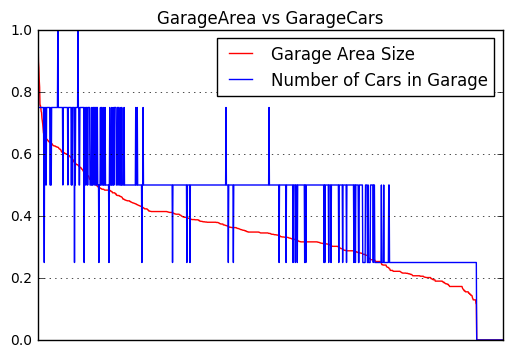

In [36]:
GaragaDF = HousingPriceDF[['GarageArea','GarageCars']].sort_values(by='GarageArea',ascending=0)
plt.title('GarageArea vs GarageCars')
#Because the size of garage area and number of cars in garage are not in the same scale, 
#we will normalize by divide with maximum value of each one
plt.plot(GaragaDF['GarageArea'].values/max(GaragaDF['GarageArea']),'r',label="Garage Area Size")
plt.plot(GaragaDF['GarageCars'].values/max(GaragaDF['GarageCars']),'b',label="Number of Cars in Garage")
plt.legend()
plt.grid()
plt.xticks([])
plt.show()

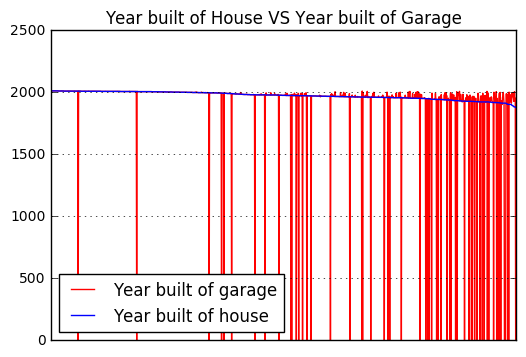

In [37]:
YearDF = HousingPriceDF[['GarageYrBlt','YearBuilt']].sort_values(by='YearBuilt',ascending=0)
plt.title('Year built of House VS Year built of Garage')
plt.plot(YearDF['GarageYrBlt'].values,'r',label="Year built of garage")
plt.plot(YearDF['YearBuilt'].values,'b',label="Year built of house")
plt.grid()
plt.legend(loc="lower left")
plt.xticks([])
plt.show()

We can see that mostly the year build of garage is equal to year built of house or higher, since people have to build the house first and build the garage later or in the same time. There are some cases that year build of garage is older than year built of house. It might be some errors.

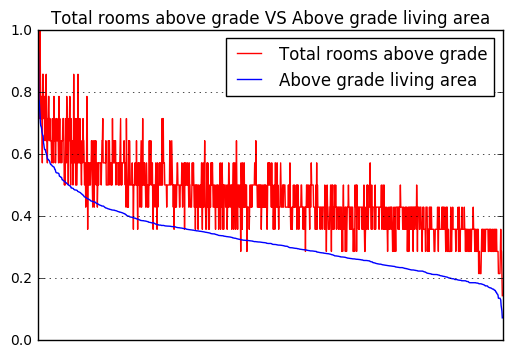

In [38]:
NumRoomDF = HousingPriceDF[['TotRmsAbvGrd','GrLivArea']].sort_values(by='GrLivArea',ascending=0)
plt.title('Total rooms above grade VS Above grade living area')
#Because the number of rooms in ground and the size of ground are not in the same scale, 
#we will normalize by divide with maximum value of each one
plt.plot(NumRoomDF['TotRmsAbvGrd'].values/max(NumRoomDF['TotRmsAbvGrd']),'r',label='Total rooms above grade')
plt.plot(NumRoomDF['GrLivArea'].values/max(NumRoomDF['GrLivArea']),'b',label='Above grade living area')
plt.grid()
plt.legend()
plt.xticks([])
plt.show()

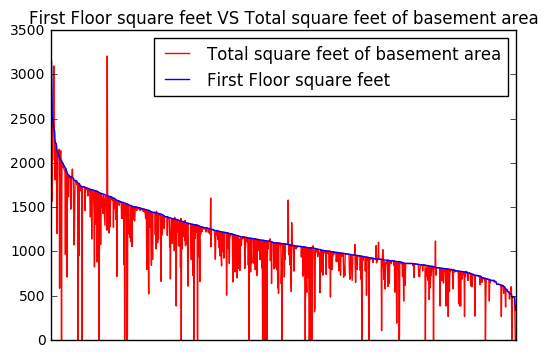

In [39]:
SFDF = HousingPriceDF[['1stFlrSF','TotalBsmtSF']].sort_values(by='1stFlrSF',ascending=0)
plt.title('First Floor square feet VS Total square feet of basement area')
plt.plot(SFDF['TotalBsmtSF'].values,'r',label='Total square feet of basement area')
plt.plot(SFDF['1stFlrSF'].values,'b',label='First Floor square feet')
plt.legend()
plt.xticks([])
plt.show()

Mostly the size of First floor is equal or higher than the size of basement area, and the difference between '1stFlrSF' and 'TotalBsmtSF' is not too high. Thus, we can see the relation between '1stFlrSF' and 'TotalBsmtSF'.
* With the high correlation between those pairs or features, it might be redundant to keep both those features. Based on the pair-correlation and the correlation with SalePrice, it is possible to remove 'GarageArea','TotalBsmtSF','TotRmsAbvGrd' and 'GarageYrBlt' without effect the accuracy of our model. We will verify this propose when training model.

In [40]:
redundantFeatures=['GarageArea','TotalBsmtSF','TotRmsAbvGrd', 'GarageYrBlt']

### 2. Categoric Features:  
For categoric features, to be used in training processes, we need to change them from categoric type to numerical types. There are two approaches to solve this problems:
- **Indexed category:** In this approach, we will assign a number to each category in categoric features. This approach is simple, but this is one disavantage. Originally, categoric features is not comparable object, but number is comparable object, so we are unintentionally adding some information to categoric features, which may have negative affect to our model.
- **One Hot Encoding:** One hot encoding is a representation of categorical variables by binary vectors. For example, Category A have three possible values: X,Y,Z and the full column is : X,Y,Y,Z,X,Z. After One Hot Encoding transform, we will have a data with three features: A_X, A_Y, A_Z with the values is A_X: [1,0,0,0,1,0]; A_Y:[0,1,1,0,0,0]; A_Z: [0,0,0,1,0,1]. By this method, we still keep the meaning and the importance of each categories in each feature without adding unintentionally information. The disavantage of this approach is the dimension increases a lot.  


In our problem, we have around 80 features with 1200 datapoint. The size of problem is not too big, even after applying one hot encoding. So, we will apply One Hot Encoding in this notebook.  

In this notebook, we will use get_dummies function of Pandas DataFrame to apply One Hot Encoding. dummy_na is set to False to ignore the missing value (NA). For example, Alley features with three possible value: Grvl, Pave and NA, only two categories will create: Alley_Grvl and Alley_Pave. If Alley columns values are: Grvl,Grvl,NA,Pave,NA,Pave, the new dataset will be Alley_Grvl: [1,1,0,0,0,0]; Alley_Pave: [0,0,0,1,0,1]. So the missing value of Alley in the original feature mean not available Alley in the house, after One hot encoding, it means the house is not Alley_Grvl and not Alley_Pave as well. So by applying get_dummies for one hot encoding, we fixs the missing value of categoric features

In [41]:
print("Number of categoric features:",len(CategoryFeatures))
print("List of categoric features:",CategoryFeatures)

Number of categoric features: 43
List of categoric features: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'SaleType', 'SaleCondition']


In [42]:
#Apply One Hot Encoding for train dataset with only categoric features
OneHotEncodeTrainDF =  pd.get_dummies(HousingPriceDF[CategoryFeatures], prefix=CategoryFeatures,dummy_na=False)
print("Size of categoric dataset after apply one hot encoding:",OneHotEncodeTrainDF.shape)
OneHotEncodeTrainDF.head()

Size of categoric dataset after apply one hot encoding: (1200, 264)


,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
495,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
916,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
968,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
533,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


So from 43 categoric features, we create 264 One Hot Encoding features. Now, we need to apply one hot encoding to test dataset but make sure that it is the same schema with train set.

In [43]:
# The value which exists in train set but not in test set will make one hot encoded dataframe of testDF lacks columns
#comparing with OneHotEncodeTrainDF so we create a dummy Test Dataframe that have the same schema 
#(same number and order of features) as TrainDataframe, and the same row index as TestDF. 
#We will all entries with ZERO.
OneHotEncodeTestDF = pd.DataFrame(0, index=TestDF.index.values, columns=OneHotEncodeTrainDF.columns)
#One Hot Encoding transform for test dataframe
onehotdata= pd.get_dummies(TestDF[CategoryFeatures], prefix=CategoryFeatures)
# New values which exists in test set but not in train set will create new columns in OneHotEncodeTestDF
# that does not exist in OneHotEncodeTrainDF. 
# To fix that, we will get the intersection of columns in OneHotEncodeTrainDF and onehotdata to fill data.
datafeatures = list(set(OneHotEncodeTrainDF.columns).intersection(onehotdata.columns))
#Filling data to Test DataFrame
OneHotEncodeTestDF[datafeatures] = onehotdata[datafeatures]

Now, we will analyzi the correlation of new features with SalePrice and between each features like we did with numerical features.

In [44]:
OneHotEncodeTrainDF['SalePrice'] = HousingPriceDF['SalePrice']
correlation = CalCorrOfDF(OneHotEncodeTrainDF)
correlation[:10]

Utilities_NoSeWa       Utilities_AllPub       1.000000
CentralAir_Y           CentralAir_N           1.000000
Street_Pave            Street_Grvl            1.000000
BldgType_Duplex        MSSubClass_90          1.000000
SaleCondition_Partial  SaleType_New           0.984125
BldgType_2fmCon        MSSubClass_190         0.981562
Exterior2nd_VinylSd    Exterior1st_VinylSd    0.979788
Exterior2nd_CmentBd    Exterior1st_CemntBd    0.979344
Exterior2nd_MetalSd    Exterior1st_MetalSd    0.977326
HouseStyle_1.5Unf      MSSubClass_45          0.960364
dtype: float64

In [45]:
print("Top 10 features that have high correlation with SalePrice:")
[(x[0][1],x[1]) for x in correlation.iteritems() if x[0][0] == 'SalePrice'][:10]

Top 10 features that have high correlation with SalePrice:


[('ExterQual_TA', 0.58640851572719443),
 ('BsmtQual_Ex', 0.56252072987068369),
 ('KitchenQual_TA', 0.51383294988004846),
 ('KitchenQual_Ex', 0.50603935426915714),
 ('Foundation_PConc', 0.49774387766910533),
 ('ExterQual_Gd', 0.44967312748108745),
 ('ExterQual_Ex', 0.44901280539483523),
 ('BsmtQual_TA', 0.44701917373444489),
 ('HeatingQC_Ex', 0.43806831672275415),
 ('BsmtFinType1_GLQ', 0.43226778295017149)]

Clearly that with the new features which contain only binary value, the correlation is not much high like the numerical features. We expect that the overall contribution of many one hot encoding features.

In [46]:
print("Top 10 pairs of features that have high correlation:")
[(x[0],x[1]) for x in correlation.iteritems() if x[0][0] != 'SalePrice'][:10]

Top 10 pairs of features that have high correlation:


[(('Utilities_NoSeWa', 'Utilities_AllPub'), 1.0),
 (('CentralAir_Y', 'CentralAir_N'), 1.0),
 (('Street_Pave', 'Street_Grvl'), 1.0),
 (('BldgType_Duplex', 'MSSubClass_90'), 1.0),
 (('SaleCondition_Partial', 'SaleType_New'), 0.98412541616648797),
 (('BldgType_2fmCon', 'MSSubClass_190'), 0.98156184029742732),
 (('Exterior2nd_VinylSd', 'Exterior1st_VinylSd'), 0.97978837208364555),
 (('Exterior2nd_CmentBd', 'Exterior1st_CemntBd'), 0.97934408468311429),
 (('Exterior2nd_MetalSd', 'Exterior1st_MetalSd'), 0.97732643565006627),
 (('HouseStyle_1.5Unf', 'MSSubClass_45'), 0.9603644736765351)]

Again, with the same reason, the binary value make the correlations between features seem too be high. However, the number of features is too high to analyze one by one. We will use PCA to reduce the number of dimension later.

### 3.Conclusion:   
So far, there are a couple steps that we did for features engineering:
- Change **MSSubClass** and **MoSold** to Category type.
- Remove **YrSold** features
- Apply One Hot Encoding transform to Category type.  

Below is our new dataset

In [47]:
MergeFeatureDF = pd.concat([HousingPriceDF[NumericalFeatures], OneHotEncodeTrainDF], axis=1)
print("Size of new dataframe:",MergeFeatureDF.shape)
print("Number of numerical features:",len(NumericalFeatures))
print("Number of One Hot Encoding features:",OneHotEncodeTrainDF.shape[1]-1)
MergeFeatureDF.head()

Size of new dataframe: (1200, 298)
Number of numerical features: 33
Number of One Hot Encoding features: 264


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
495,60.0,7879,4,5,1920,1950,0.0,495,0,225,...,0,0,1,1,0,0,0,0,0,34900
916,50.0,9000,2,3,1949,1950,0.0,50,0,430,...,0,0,1,1,0,0,0,0,0,35311
968,50.0,5925,3,6,1910,1950,0.0,0,0,600,...,0,0,1,1,0,0,0,0,0,37900
533,50.0,5000,1,3,1946,1950,0.0,0,0,0,...,0,0,1,0,0,0,0,1,0,39300
30,50.0,8500,4,4,1920,1950,0.0,0,0,649,...,0,0,1,0,0,0,0,1,0,40000


 As previous discuss, there are some features that have low correlation with Sale Price and some redundant features, we will verify that we can remove them without having negative affect to the accuracy of model or not in below Training model part.

# B. Training Model:  
In this part, we will use regression models from scikit learn to train our model. 
* First, we will use simple mode: linear regression model, and train with only numerical features, with only One Hot Encoding Features and the merging of those two kinds of features. In this first step, we will try to reduce the numerical features that has low correlation with SalePrice and redundant numerical Features. We will also try to apply PCA to reduct the dimension of our dataset.
* Second, we will use some other complex regression model from scikit learn.  


Throughout this part, we will use KFold to cross validation and measure the performance of our model by Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

In [48]:
from sklearn.model_selection import KFold

def KFoldTrain(featuresMatrix,log_price,model,foldNum):
    """
    Verify model with K Fold cross validation by Root-Mean-Square-Error(RMSE) metric
    Args:
        featuresMatrix: features matrix
        log_price:      logarithm of Sale price
        model:          input model need to be validated.
        foldNum:        number of fold for training.
    Returns:
        RMSE of train set, RMSE of test set
    """
    # Setup KFold, data will be shuffle before spliting
    kf = KFold(n_splits=foldNum,shuffle=True)
    kf.get_n_splits(featuresMatrix)
    TrainError = []
    TestError = []
    for train_index, test_index in kf.split(featuresMatrix):
        #Split dataset to train set and test set
        X_train, X_test = featuresMatrix[train_index], featuresMatrix[test_index]
        #Split target value to according to train set and test set
        y_train, y_test = log_price[train_index], log_price[test_index]
        #Predict for test set
        model.fit(X_train,y_train)
        predictTrainPrice = model.predict(X_train)
        predictTestPrice = model.predict(X_test)
        #Calculate Root mean square error.
        TrainError.append(CalRMSE(predictTrainPrice, y_train))
        TestError.append(CalRMSE(predictTestPrice, y_test))
    return TrainError,TestError

### 1. Training only with numerical features:
First, we will try with simple linear regression model from scikit-learn and train with numerical features. After filling missing values, we expect that there is no missing value in our dataset in NumericalFeatures

In [49]:
MissTestDf = CalMissingInfor(HousingPriceDF[NumericalFeatures])
print("Number of features have missing values in test set",MissTestDf.shape[0])
MissTestDf

Number of features have missing values in test set 0


,FeatureName,MissingNum,MissingPercentage,Type


First, we will train with all numerical features

In [50]:
#Init regresion model. fit_intercept=True because our dataset is not centre.
LinearRegr = linear_model.LinearRegression( fit_intercept=True)
#Extract features matrix from features dataframe 
trainFeatures = HousingPriceDF[NumericalFeatures].values
#We will train with logarithm of housing price
Log_SalePrice = np.log(HousingPriceDF['SalePrice'].values)
#Since we have 1200 datapoints in our dataset, we will validate with 5-fold, 
#then the size of validation test will be 1200/5 =240, nearly the same with size of our testset.
#Get RMSE from 5-fold cross validation
RMSE = KFoldTrain(trainFeatures,Log_SalePrice,LinearRegr,5)
print("Mean of RMSE of test set:",np.mean(RMSE[1]))

Mean of RMSE of test set: 0.13980662853


With only numerical features, the RMSE  is much better than the simplist approach using mean value to predict (With RMSE is std of target is 0.40).  

Now we will visuallize the predict value and the real value to know how it fit

In [51]:
#Split dataset to train and test to visualize the result on train set and test set
train=HousingPriceDF.sample(frac=0.8)
#Sort our dataset by SalePrice for more clear shape of housing price.
train = train.sort_values(by='SalePrice',ascending=1)
test=HousingPriceDF.drop(train.index)
print("Size of train set:",train.shape)
print("Size of test set:",test.shape)

Size of train set: (960, 77)
Size of test set: (240, 77)


In [52]:
#Transform features value from dataframe to matrix
trainF = train[NumericalFeatures].values
testF = test[NumericalFeatures].values
#Get the logarithm of price
log_trainSP = np.log(train['SalePrice'].values)
log_testSP = np.log(test['SalePrice'].values)

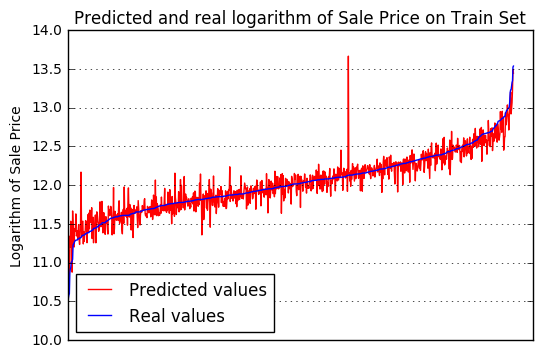

In [53]:
LinearRegr.fit(trainF,log_trainSP)
plt.title("Predicted and real logarithm of Sale Price on Train Set")
plt.plot(LinearRegr.predict(trainF),'r',label='Predicted values')
plt.plot(log_trainSP,'b',label='Real values')
plt.legend(loc='lower left')
plt.xticks([])
plt.ylabel("Logarithm of Sale Price")
plt.grid()
plt.show()

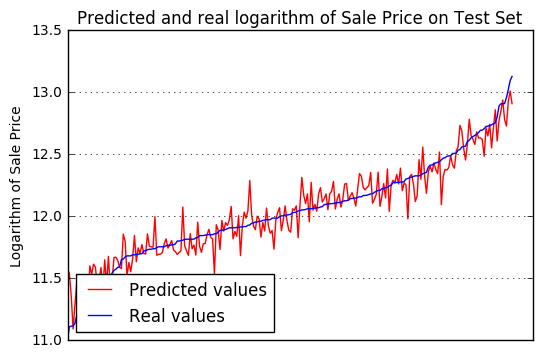

In [54]:
plt.title("Predicted and real logarithm of Sale Price on Test Set")
plt.plot(LinearRegr.predict(testF),'r',label='Predicted values')
plt.plot(log_testSP,'b',label='Real values')
plt.legend(loc='lower left')
plt.xticks([])
plt.ylabel("Logarithm of Sale Price")
plt.grid()
plt.show()

We can see that the predicted value curve can capture the shape of the real value curve, and it fit better in train set than test set.  

Now, we will try to reduce the features that have low correlation with SalePrice. 

In [55]:
correlation = CalCorrOfDF(HousingPriceDF[NumericalFeatures+['SalePrice']])
#Get only the correlation related to SalePrice
CorrWithSalePrice = [(x[0][1],x[1]) for x in correlation.iteritems() if x[0][0] == 'SalePrice']

Number of features that have lowest RMSE 29
Min RMSE 0.138289573407


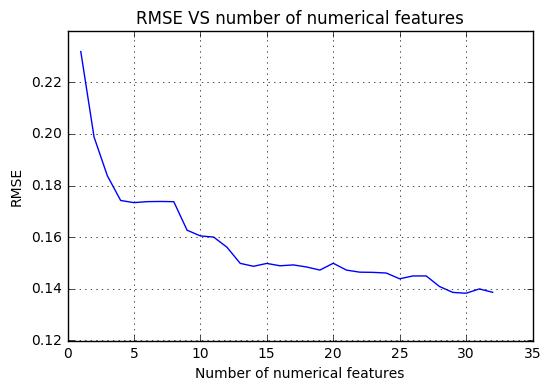

In [56]:
#List of features have high correlation with SalePrice, already in ascending order
rankedFeatures = [f[0] for f in CorrWithSalePrice]
Err = []
#iterate from 1 to number of rankedFeatures to choose the number of high correlation features will be used.
for N in range(1,len(rankedFeatures)):
    # At each iteration we take one more feature into account
    # at first we take into account just the top ranked feature "OverallQual"
    # in the end we take all features into account
    LinearRegr = linear_model.LinearRegression( fit_intercept=True,normalize=False)
    #feed only N highest features to train
    feat = HousingPriceDF[rankedFeatures[:N]].values
    #Only get error of testset
    error = KFoldTrain(feat,Log_SalePrice,LinearRegr,5)[1]
    Err += [np.mean(error)]
print("Number of features that have lowest RMSE",Err.index(min(Err)))
print("Min RMSE",min(Err))
plt.title("RMSE VS number of numerical features")
plt.plot(range(1,len(rankedFeatures)),Err)
plt.ylabel("RMSE")
plt.xlabel("Number of numerical features")
plt.grid()
plt.show()

We can see that RMSE quite the same when we increase the number of numerical features to train from 27 to 33, and the best value we get is training by 28 features.  

In [95]:
ChosenNumericalFeatures = NumericalFeatures[:29]
ChosenNumericalFeatures

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch']

Now, we try to remove the redundant features and verify that we still have the same performance or not

In [96]:
#Init regresion model. fit_intercept=True because our dataset is not centre.
LinearRegr = linear_model.LinearRegression( fit_intercept=True)
#Extract features matrix from features dataframe, remove redundante features
trainFeatures = HousingPriceDF[ChosenNumericalFeatures].drop(redundantFeatures,axis=1).values
RMSE = KFoldTrain(trainFeatures,Log_SalePrice,LinearRegr,5)
print("Mean of RMSE of test set:",np.mean(RMSE[1]))

Mean of RMSE of test set: 0.141783955272


Removing redundante features has negative affect to our performance. So we will not ignore redundant numerical features.

### 2.Training only with One Hot Encoding Features:  

The same approach in numerical feature part, we will apply linear regression for all the One Hot Encoding features. Then we will use PCA to reduce the dimension.

In [97]:
LinearRegr = linear_model.LinearRegression( fit_intercept=True)
trainFeatures = OneHotEncodeTrainDF.drop('SalePrice',axis=1).values
RMSE = KFoldTrain(trainFeatures,Log_SalePrice,LinearRegr,5)

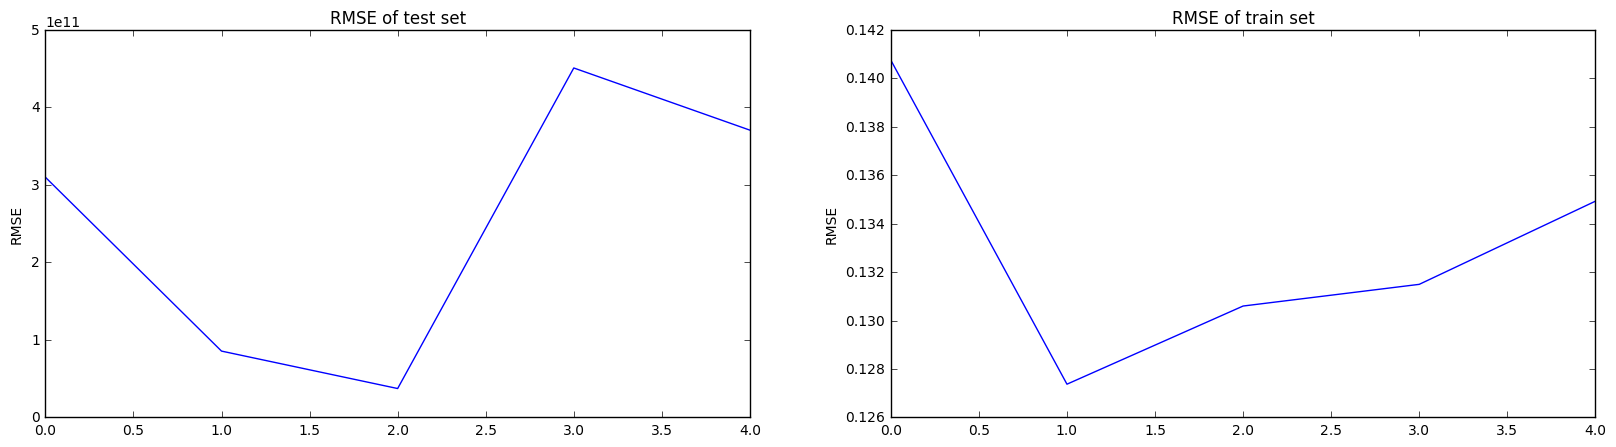

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(RMSE[1])
plt.title("RMSE of test set")
plt.ylabel("RMSE")
plt.subplot(122)
plt.plot(RMSE[0])
plt.title("RMSE of train set")
plt.ylabel("RMSE")
plt.show()

We can see that RMSE of train set is low, but RMSE of test set is extremely high. It is a big overfiting problem. This is because we are using a lot of simple features (binary value). We can overcome this problem by reducing the number of dimension.

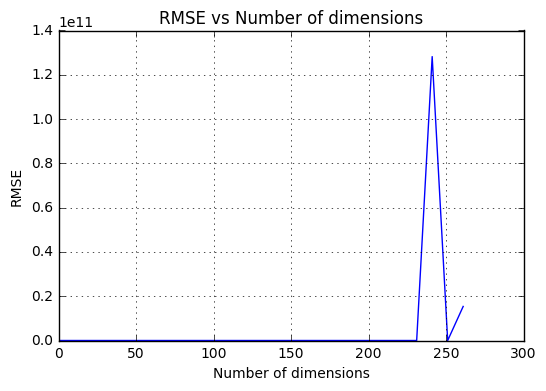

In [99]:
Err = []
#iterate from 1 to number of rankedFeatures to choose the number of high correlation features will be used.
for nb in range(1,trainFeatures.shape[1],10):
    #Applying PCA with the corresponding number of components
    pca = PCA(n_components=nb)
    pca.fit(trainFeatures)
    #transform the features matrix to reduce the dimension
    trainFeaturesPCA = pca.transform(trainFeatures)
    LinearRegr = linear_model.LinearRegression( fit_intercept=True)
    #get the RMSE of test set only
    RMSE = KFoldTrain(trainFeaturesPCA,Log_SalePrice,LinearRegr,5)[1]
    Err += [np.mean(RMSE)]
plt.plot(range(1,trainFeatures.shape[1],10),Err)
plt.xlabel("Number of dimensions")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of dimensions")
plt.grid()
plt.show()

RMSE increases a lot when the number of dimensions is higher than 200.

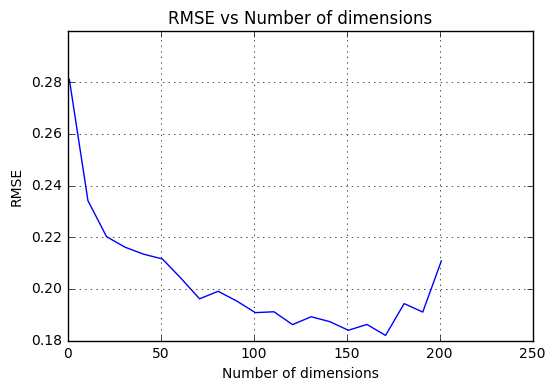

In [100]:
Err = []
for nb in range(1,210,10):
    #Applying PCA with the corresponding number of components
    pca = PCA(n_components=nb)
    pca.fit(trainFeatures)
    trainFeaturesPCA = pca.transform(trainFeatures)
    LinearRegr = linear_model.LinearRegression( fit_intercept=True,normalize=False)
    error = KFoldTrain(trainFeaturesPCA,Log_SalePrice,LinearRegr,5)[1]
    Err += [np.mean(error)]
plt.plot(range(1,210,10),Err)
plt.xlabel("Number of dimensions")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of dimensions")
plt.grid()
plt.show()

In [101]:
print("Number of dimension that gives minum RMSE",Err.index(min(Err))*10)
print("minum RMSE",min(Err))

Number of dimension that gives minum RMSE 170
minum RMSE 0.181968085069


The performance of our model when only use One Hot Encoding features is not good at using only numerical features. We hope that the performance  will be better when we use both numerical features an one hot encoding features.

### 3. Training with merge features:

Again, we will use simple linear regression model with numerical features and One Hot Encoding after PCA from the previous part. We will verify the new RMSE of this model. Then we will merge numerical features and One Hot Encoding before PCA, and then apply PCA on whole merge features.

In [102]:
#Numerical features with chosen numerical features from previous part.
NumericalFeature = HousingPriceDF[ChosenNumericalFeatures].values
#Apply PCA with 160 component for train features
pca = PCA(n_components=170)
OHEFeature = OneHotEncodeTrainDF.drop('SalePrice',axis=1).values
pca.fit(OHEFeature)
trainFeaturesPCA = pca.transform(OHEFeature)
#concatenate the numerical features and one hot encoding features.
MergeFinalFeatures = np.concatenate((NumericalFeature, trainFeaturesPCA), axis=1)

In [103]:
LinearRegr = linear_model.LinearRegression(fit_intercept=True)
RMSE = KFoldTrain(MergeFinalFeatures,Log_SalePrice,LinearRegr,5)
np.mean(RMSE[1])

0.13840323828646847

A little bit improvement but not two much. We come to second approach, merge the features first, then apply PCA later

In [104]:
#merging the feature before PCA
OHEtrainFeatures = OneHotEncodeTrainDF.drop('SalePrice',axis=1).values
NUMtrainFeatures = HousingPriceDF[ChosenNumericalFeatures].values
mergeTrainFeatures = np.concatenate((NUMtrainFeatures, OHEtrainFeatures), axis=1)

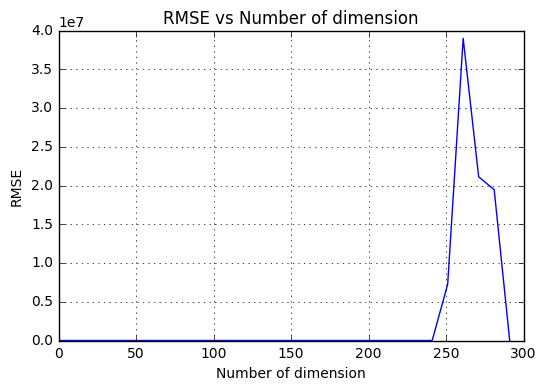

In [105]:
Err = []
for nb in range(1,mergeTrainFeatures.shape[1],10):
    pca = PCA(n_components=nb)
    pca.fit(mergeTrainFeatures)
    trainFeaturesPCA = pca.transform(mergeTrainFeatures)

    regr = linear_model.LinearRegression( fit_intercept=True)
    error = KFoldTrain(trainFeaturesPCA,Log_SalePrice,regr,5)[1]
    Err += [np.mean(error)]
    
plt.plot(range(1,mergeTrainFeatures.shape[1],10),Err)
plt.title("RMSE vs Number of dimension")
plt.xlabel("Number of dimension")
plt.ylabel("RMSE")
plt.grid()
plt.show()

Again, we are facing overfiting problem when number of dimension is higher than 220

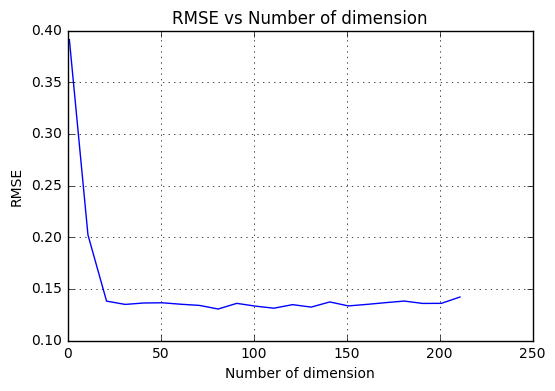

Number of dimension that gives minum RMSE 80
minimum RMSE 0.130468647776


In [106]:
#Run iteration again from 1 to 220 with step is 10
Err = []
ErrorList = []
for nb in range(1,220,10):
    pca = PCA(n_components=nb)
    pca.fit(mergeTrainFeatures)
    trainFeaturesPCA = pca.transform(mergeTrainFeatures)

    regr = linear_model.LinearRegression( fit_intercept=True)
    error = KFoldTrain(trainFeaturesPCA,Log_SalePrice,regr,5)
    ErrorList.append(error)
    #calculate only error for testset
    Err += [np.mean(error[1])]

    
plt.plot(range(1,220,10),Err)
plt.title("RMSE vs Number of dimension")
plt.xlabel("Number of dimension")
plt.ylabel("RMSE")
plt.grid()
plt.show()
print("Number of dimension that gives minum RMSE",Err.index(min(Err))*10)
print("minimum RMSE",min(Err))

The RMSE is lower than using only numerical feature now. So the final approaching is merging numerical features and one hot encoding features, and then apply PCA with number of component is 80.  

In [109]:
pca = PCA(n_components=80)
pca.fit(mergeTrainFeatures)
MergeFeaturesPCA = pca.transform(mergeTrainFeatures)

LinearRegr = linear_model.LinearRegression( fit_intercept=True)
error = KFoldTrain(MergeFeaturesPCA,Log_SalePrice,LinearRegr,5)
print("RMSE of test",np.mean(error[1]))

RMSE of test 0.130357726341


Now we look deeper on the RMSE curve of Train Set and Test Set:

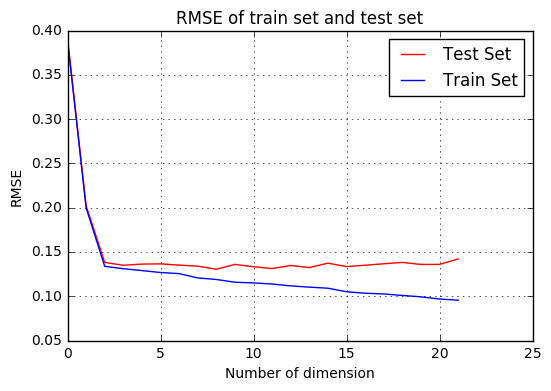

In [110]:
plt.title("RMSE of train set and test set")
plt.plot(Err,'r',label="Test Set")
plt.plot([np.mean(e[0]) for e in ErrorList],'b',label="Train Set")
plt.ylabel("RMSE")
plt.xlabel("Number of dimension")
plt.grid()
plt.legend()
plt.show()

We can see that RMSE of Train set is lower that Test Set, there is still overfiting in our model. We will try to use other model to overcome the overfitting and improve our model.

### 4. Complex model:

To overcome overfiting model, we should use some model support regularization. We will use Ridge Regression model and Lasso model from scikit-learn.

***4.1 Ridge Regression:***

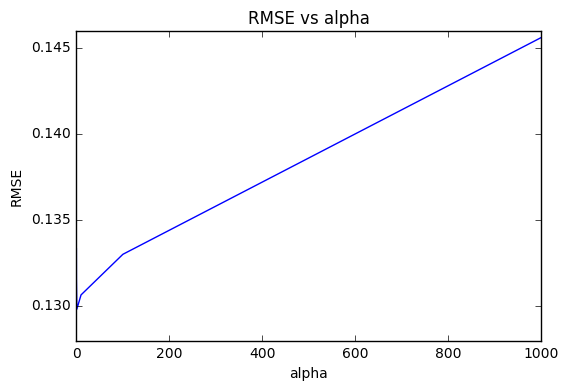

In [111]:
alpharange = [0.01,0.1,1,10,100,1000]
RMSEList = []
for a in alpharange:
    RigdeReg = linear_model.Ridge(alpha = a)
    RMSE = KFoldTrain(MergeFeaturesPCA,Log_SalePrice,RigdeReg,5)[1]
    RMSEList.append(np.mean(RMSE))
plt.title("RMSE vs alpha")
plt.plot(alpharange,RMSEList)
plt.xlabel("alpha")
plt.ylabel("RMSE")

plt.show()  

In [112]:
print("Minimum RMSE of model:",min(RMSEList))
print("Best alpha for this model:",alpharange[RMSEList.index(min(RMSEList))])

Minimum RMSE of model: 0.129819874174
Best alpha for this model: 1


It is not much different comparing with linear regression. Because this model support regularization to overcome the overfitting, we might do not need to apply PCA before training.  
***Training with dataset before PCA***

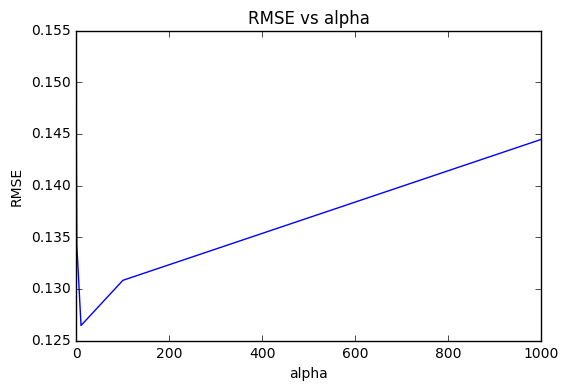

In [115]:
alpharange = [0.01,0.1,1,10,100,1000]
RMSEList = []
for a in alpharange:
    RigdeReg = linear_model.Ridge(alpha = a)
    RMSE = KFoldTrain(mergeTrainFeatures,Log_SalePrice,RigdeReg,5)[1]
    RMSEList.append(np.mean(RMSE))
plt.title("RMSE vs alpha")
plt.plot(alpharange,RMSEList)
plt.xlabel("alpha")
plt.ylabel("RMSE")

plt.show() 

In [116]:
print("Minimum RMSE of model:",min(RMSEList))
print("Best alpha for this model:",alpharange[RMSEList.index(min(RMSEList))])

Minimum RMSE of model: 0.126452044094
Best alpha for this model: 10


The performance of our model is better when we put the dataset before apply PCA.

***4.2 Lasso Regression:***  

The same with approach applied in Ridge regression, we will train our model with dataset after apply PCA and dataset before apply PCA

**4.2.1: Lasso with dataset after PCA**

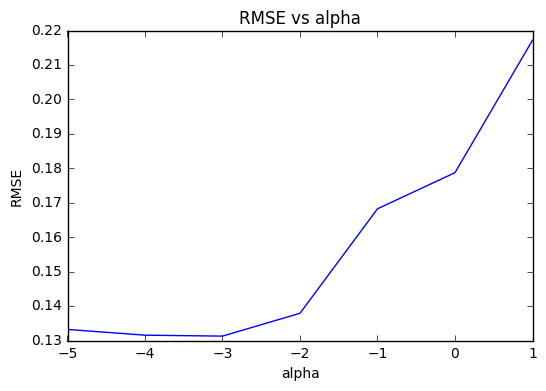

In [117]:
alpharange = [0.00001,0.0001,0.001,0.01,0.1,1,10]
RMSEList = []
for a in alpharange:
    LassoReg = linear_model.Lasso(alpha = a)
    RMSE = KFoldTrain(MergeFeaturesPCA,Log_SalePrice,LassoReg,5)[1]
    RMSEList.append(np.mean(RMSE))
plt.title("RMSE vs alpha")
plt.plot(np.log10(alpharange),RMSEList)
plt.xlabel("alpha")
plt.ylabel("RMSE")

plt.show()  

In [118]:
print("Minimum RMSE of model:",min(RMSEList))
print("Best alpha for this model:",alpharange[RMSEList.index(min(RMSEList))])

Minimum RMSE of model: 0.131274596204
Best alpha for this model: 0.001


**4.2.2: Lasso with dataset before PCA**

/Users/vunguyen/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


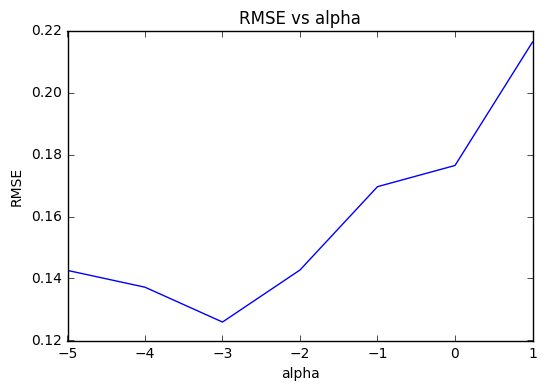

In [119]:
alpharange = [0.00001,0.0001,0.001,0.01,0.1,1,10]
RMSEList = []
for a in alpharange:
    LassoReg = linear_model.Lasso(alpha = a)
    RMSE = KFoldTrain(mergeTrainFeatures,Log_SalePrice,LassoReg,5)[1]
    RMSEList.append(np.mean(RMSE))
plt.title("RMSE vs alpha")
plt.plot(np.log10(alpharange),RMSEList)
plt.xlabel("alpha")
plt.ylabel("RMSE")

plt.show()  

In [120]:
print("Minimum RMSE of model:",min(RMSEList))
print("Best alpha for this model:",alpharange[RMSEList.index(min(RMSEList))])

Minimum RMSE of model: 0.125954657736
Best alpha for this model: 0.001


The result of Lasso model is quite the same with Ridge regression model, and it is better when we train model with dataset before PCA

***4.3 XGBoost:***
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm. Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.  

In this notebook we will user XGBoost with some initial parameters following by the suggestion from https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/.
After that, we will use GridSearchCV of Scikit-learn on parameter gamma and learning_rate to choose the best model

In [121]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [137]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.1, max_depth=3, 
                             min_child_weight=2, n_estimators=2000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5, silent=1,
                             random_state =7, nthread = -1)

In [123]:
#Split training dataset and testing dataset to verify our model
TrainMerFeature = mergeTrainFeatures[train.index]
TestMerFeature = mergeTrainFeatures[test.index]

LogSPTrain = Log_SalePrice[train.index]
LogSPTest = Log_SalePrice[test.index]

In [138]:
# Set the parameters by cross-validation
tuned_parameters = [{'gamma': [0.01,0.025,0.05],
                     'learning_rate': [0.01, 0.05, 0.1]}]
#Runing grid search cross validation with CV=5, scoring is neg_mean_squared_error since gridsearch will maximize score
clf = GridSearchCV(model_xgb, tuned_parameters, cv=5, scoring="neg_mean_squared_error")
clf.fit(TrainMerFeature, LogSPTrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.05, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=2, missing=None,
       n_estimators=2000, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=7, reg_alpha=0.5, reg_lambda=0.8, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.5),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.025, 0.05], 'learning_rate': [0.01, 0.05, 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [143]:
print("The gamma and learning rate:",clf.best_params_)

The gamma and learning rate: {'gamma': 0.01, 'learning_rate': 0.01}


In [144]:
#Verify with testset
predictvalue = clf.predict(TestMerFeature)
print("RMSE of model:",CalRMSE(predictvalue,LogSPTest))

RMSE of model: 0.113382490465


Our model train with XGBoost gives us the best model with lowest RMSE in all the model we tried

# C. Conclusion:  

For the experiment in this notebook, we are going to finalize a good model with RMSE of logarithm value is around 0.127. The model comes throught some steps:
- Filling missing values
- Removing **PoolQC**, **YrSold** features.
- Change **MSSubClass** and **MoSold** to Category type.
- For numerical features, keeps 28 features that have highest correlation with SalePrice to train model.
- For Categoric features, transforming by One Hot Encoding.
- Merging Numerical features with categoric features.
- Train model with XGBoost  model with Alpha is gamma = 0.01 and learning_rate = 0.01

# D. Predict for test set

In [156]:
#Keep only necessary numerical Features.
NumericalFeaturesTest = TestDF[ChosenNumericalFeatures].values
#Get one hot encoder value
OHEFeatureTest = OneHotEncodeTestDF.values
#Merge numerical features with one hot encoder features.
MergeFinalFeaturesTest = np.concatenate((NumericalFeaturesTest, OHEFeatureTest), axis=1)
#Apply PCA for merger features.

In [157]:
#Predict logarithm of Sale Price in test dataset
Testprice=clf.predict(MergeFinalFeaturesTest)
#Change from logarithm value to real value
TestDF['SalePrice'] = np.exp(Testprice)

In [158]:
#Export to csv file
FinalResult = TestDF[['Id','SalePrice']]
FinalResult.to_csv("Submission.cvs",index=False)